# Base de données

## Import des données

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('beer_quality.xlsx')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Séparation des données en features et label 

In [5]:
X = df.iloc[:, :11]

In [6]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [7]:
y = df.iloc[:, -1]

In [8]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

## Séparation des données en train et en test

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# B. Classification Binaire 

## Création de nouvelle variable en fonction de la médiane de y 

In [11]:
import statistics

#Calcul de la médiane
statistics.median(y_train)

6

In [12]:
#Implémentation de ybin en fonction de la médiane 

ybin = []

for i in y:
    m = 6
    if i < m:
        ybin.append(0)
        
    else:
        ybin.append(1)
            

In [13]:
ybin

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,


In [14]:
new_df=df.assign(ybin= ybin)

In [15]:
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ybin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [16]:
# On cherche à prédire ybin, on supprime quality
new_df.drop("quality", axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,ybin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [17]:
X = new_df.iloc[:, :11]
y = new_df.iloc[:, -1]

In [18]:
#sc=StandardScaler()

#scaler = sc.fit(X)
#X = scaler.transform(X)

#print(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Arbre de décision

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [21]:
clf = DecisionTreeClassifier(criterion = 'entropy')

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : np.arange(1,5),
             'min_samples_split' : np.arange (1,5)}


In [23]:
grid = GridSearchCV(clf, param_grid, cv = 5)

In [24]:
grid.fit(X_train, y_train)

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': array([1, 2, 3, 4]),
                         'min_samples_split': array([1, 2, 3, 4])})

In [25]:
model = grid.best_estimator_

In [26]:
model.score(X_test, y_test)

0.6770833333333334

## Algorithme AdaBoost

In [27]:
from sklearn.ensemble import AdaBoostClassifier

In [28]:
max_depth = 1
model_a = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = 100)

In [29]:
model_a.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

In [30]:
model_a.score(X_test, y_test)

0.70625

In [31]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
from matplotlib import pyplot
import pylab 

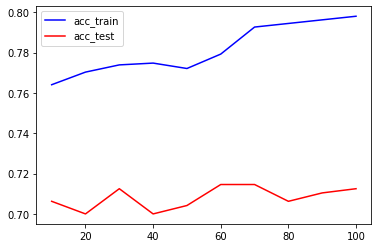

In [33]:
n_estimators = [10,20, 30, 40, 50, 60,70,80,90,100]
accuracy_train = []
accuracy_test = []

for i in range(len(n_estimators)):
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=n_estimators[i])

    # Train Adaboost Classifer
    model = bdt.fit(X_train, y_train)
    accuracy_train.append(bdt.score(X_train, y_train))
    accuracy_test.append(bdt.score(X_test, y_test))


pylab.plot(n_estimators, accuracy_train, '-b', label='acc_train')
pylab.plot(n_estimators, accuracy_test, '-r', label='acc_test')
pylab.legend(loc='upper left')
pylab.show()

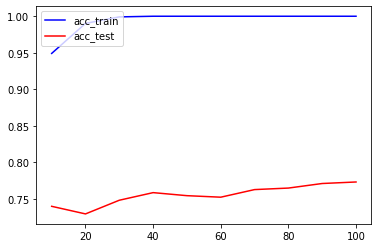

In [34]:
n_estimators = [10,20, 30, 40, 50, 60,70,80,90,100]
accuracy_train = []
accuracy_test = []

for i in range(len(n_estimators)):
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), algorithm="SAMME", n_estimators=n_estimators[i])

    # Train Adaboost Classifer
    model = bdt.fit(X_train, y_train)
    accuracy_train.append(bdt.score(X_train, y_train))
    accuracy_test.append(bdt.score(X_test, y_test))


pylab.plot(n_estimators, accuracy_train, '-b', label='acc_train')
pylab.plot(n_estimators, accuracy_test, '-r', label='acc_test')
pylab.legend(loc='upper left')
pylab.show()


## Importance des features selectionnées par AdaBoost

In [35]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure()
    plt.barh(range(n_features),sorted(model.feature_importances_), align='center') 
    plt.yticks(np.arange(n_features), X_train.columns) 
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title("Features importance", fontsize=15)


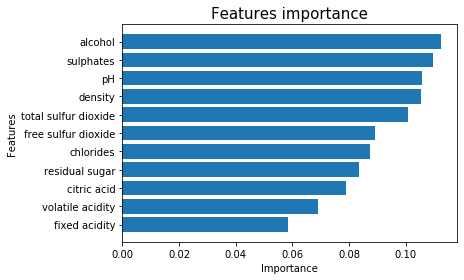

In [36]:
plot_feature_importances(model)

# C. Classification multiclasse

## 1. Création de ymulti

In [37]:
# On repart du dataset initial afin d'attribuer les 3 nouvelles modalités à partir de quality
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [38]:
X = df.iloc[:, :11]
y = df.iloc[:, -1]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Sur l'application de la valeur des modalités : 

- Inférieur à 5 : 0
- Egale à 5 : 1
- Supérieur à 5 : 2

In [40]:
#Implémentation de ymulti en fonction de la moyenne

ymulti = []

for i in y:
    
    if i < 5:
        ymulti.append(0)
        
    elif i == 5:
        ymulti.append(1)
    else:
        ymulti.append(2)

In [41]:
ymulti

[1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,


In [42]:
new_df1=df.assign(ymulti= ymulti)

In [43]:
new_df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ymulti
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [44]:
# On cherche à prédire ymulti, on supprime quality
new_df1.drop("quality", axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,ymulti
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [45]:
X = new_df1.iloc[:, :11]
y = new_df1.iloc[:, -1]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Nombre d'occurence par modalité

In [47]:
new_df1['ymulti'].value_counts()

2    855
1    681
0     63
Name: ymulti, dtype: int64

In [48]:
y_train.value_counts()

2    588
1    486
0     45
Name: ymulti, dtype: int64

In [49]:
# Oversample and plot imbalanced dataset with SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

# transform the dataset
oversample = SMOTE(random_state=0, sampling_strategy='all')
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train_balanced)
print(counter)

Counter({2: 588, 1: 588, 0: 588})


# Partie 1

In [50]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train_balanced, y_train_balanced, test_size=0.3, random_state=42)

In [51]:
X_train2, X_val1, y_train2, y_val1 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Résultats sur la base avec les données équilibrées

In [52]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=1, early_stopping = True, max_iter=300,learning_rate_init=0.1)
clf.fit(X_train1, y_train1)

clf.score(X_val, y_val)

0.3452830188679245

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {'activation' : ['identity','logistic', 'tahn', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'learning_rate' : ['constant', 'invscaling', 'adaptive']
             }


In [54]:
gride = GridSearchCV(clf, param_grid, cv = 5)

In [55]:
gride.fit(X_train1, y_train1)

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.53231296 0.33954445 0.43687173 0.55342813 0.37436227 0.44810572
 0.47900332 0.41814292 0.46924723 0.4935486  0.36545538 0.37760113
 0.33954445 0.33549258 0.40690234 0.39217603 0.35492907 0.38731444
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.33954445 0.35735822 0.35735822
 0.33954445 0.33387314 0.33549587 0.35498502 0.33387314 0.33306672]
  category=UserWarning


GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, hidden_layer_sizes=1,
                                     learning_rate_init=0.1, max_iter=300),
             param_grid={'activation': ['identity', 'logistic', 'tahn', 'relu'],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [56]:
gride.best_estimator_

MLPClassifier(activation='identity', early_stopping=True, hidden_layer_sizes=1,
              learning_rate='invscaling', learning_rate_init=0.1, max_iter=300,
              solver='lbfgs')

In [57]:
model =  gride.best_estimator_

In [58]:
model.fit(X_train1, y_train1)

MLPClassifier(activation='identity', early_stopping=True, hidden_layer_sizes=1,
              learning_rate='invscaling', learning_rate_init=0.1, max_iter=300,
              solver='lbfgs')

In [59]:
model.score(X_val, y_val)

0.41132075471698115

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
y_pred = model.predict(X_val)

In [62]:
y_pred

array([0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0,
       0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2, 0,
       2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2,
       2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0,
       1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0,
       2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2,
       0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2,
       2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 0,
       2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0,
       1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2,

In [63]:
confusion_matrix(y_val, y_pred)

array([[93, 43, 42],
       [52, 72, 59],
       [74, 42, 53]], dtype=int64)

# Résultats sur la base avec les données non-équilibrées

In [64]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=1, early_stopping = True, max_iter=300,learning_rate_init=0.1)
clf.fit(X_train2, y_train2)

clf.score(X_val1, y_val1)

0.5327380952380952

In [65]:
from sklearn.model_selection import GridSearchCV


param_grid = {'activation' : ['identity','logistic', 'tahn', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'learning_rate' : ['constant', 'invscaling', 'adaptive']
             }

gride = GridSearchCV(clf, param_grid, cv = 5)

gride.fit(X_train2, y_train2)

model =  gride.best_estimator_
model.fit(X_train2, y_train2)

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.70100441 0.52246448 0.5144782  0.6578148  0.51587457 0.57488976
 0.68323534 0.57095378 0.57995264 0.60642659 0.51734444 0.54542708
 0.56821003 0.52235016 0.52235016 0.63488486 0.50311939 0.51980238
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.52235016 0.52235016 0.53773477
 0.53381512 0.50568349 0.50451576 0.52235016 0.52363221 0.52235016]
  category=UserWarning
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', early_stopping=True, hidden_layer_sizes=1,
              learning_rate_init=0.1, max_iter=300, solver='lbfgs')

In [66]:
model.score(X_val1, y_val1)

0.7261904761904762

In [67]:
y_pred1 = model.predict(X_val1)

In [68]:
confusion_matrix(y_val1, y_pred1)

array([[  0,   5,   3],
       [  0, 100,  49],
       [  0,  35, 144]], dtype=int64)

In [69]:
y_val1.value_counts()

2    179
1    149
0      8
Name: ymulti, dtype: int64

## Bagging

### Données équilibrées 

In [77]:
from sklearn.ensemble import BaggingClassifier

n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_train = []
accuracy_test = []

for i in range(len(n_estimators)):
    bagging = BaggingClassifier(base_estimator=MLPClassifier(early_stopping=True, hidden_layer_sizes=1))
    model = bagging.fit(X_train1, y_train1)
    accuracy_train.append(bagging.score(X_train1, y_train1))
    accuracy_test.append(bagging.score(X_val, y_val))

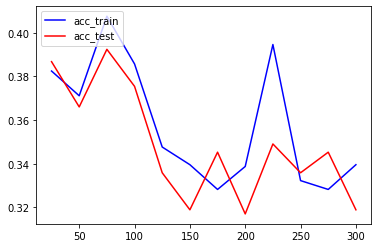

In [78]:
pylab.plot(n_estimators, accuracy_train, '-b', label='acc_train')
pylab.plot(n_estimators, accuracy_test, '-r', label='acc_test')
pylab.legend(loc='upper left')
pylab.show()

### Données non-équilibrées


In [79]:
from sklearn.ensemble import BaggingClassifier

n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_train = []
accuracy_test = []

for i in range(len(n_estimators)):
    bagging = BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes=1, early_stopping = True, max_iter=300,learning_rate_init=0.1))
    model = bagging.fit(X_train2, y_train2)
    accuracy_train.append(bagging.score(X_train1, y_train1))
    accuracy_test.append(bagging.score(X_val1, y_val1))

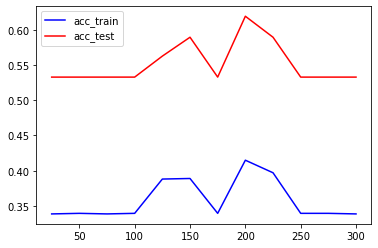

In [80]:
pylab.plot(n_estimators, accuracy_train, '-b', label='acc_train')
pylab.plot(n_estimators, accuracy_test, '-r', label='acc_test')
pylab.legend(loc='upper left')
pylab.show()

# Partie 2 

## Entrainement de forêt aléatoire

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [89]:
param_dist = {
    "max_depth": [1,2,3,4,5,6,7,8,9,10],
    "n_estimators": [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
}

In [90]:
clf = RandomForestClassifier()

In [91]:
search = RandomizedSearchCV(clf, param_dist) 

## Données équilibrées

In [93]:
search.fit(X_train1, y_train1)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [25, 50, 75, 100, 125,
                                                         150, 175, 200, 225,
                                                         250, 275, 300]})

In [97]:
model = search.best_estimator_
model.fit(X_train1, y_train1)
model.score(X_val,y_val)

0.809433962264151

In [98]:
n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_train = []
accuracy_test = []

for i in range(len(n_estimators)):
    model = model.fit(X_train1, y_train1)
    accuracy_train.append(model.score(X_train1, y_train1))
    accuracy_test.append(model.score(X_val, y_val))

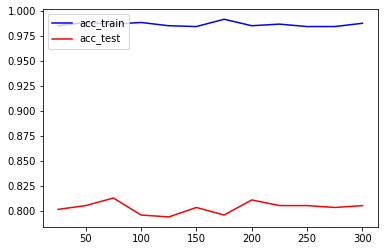

In [99]:
pylab.plot(n_estimators, accuracy_train, '-b', label='acc_train')
pylab.plot(n_estimators, accuracy_test, '-r', label='acc_test')
pylab.legend(loc='upper left')
pylab.show()